In [1]:
import math
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

In [2]:
def dispersion_exp(sample):
    return np.mean(list(map(lambda x: x*x, sample))) - math.pow((np.mean(sample)),2)

def normal(size):
    return np.random.standard_normal(size=size)

In [3]:
class CommonMethod:
    gamma = 1 - 0.95
    m_all, s_all, x_set, n_set = [], [], [], []
    text = None

    def __init__(self, x_set, n_set):
        self.n_set = n_set
        self.x_set = x_set

    def get_e(self, m, x, n, s):
        return math.pow(sum(list(map(lambda el: (el - m) ** 4, x))) / n * s, 4) - 3

In [4]:
class OrdinaryMethod(CommonMethod):
    text = "normal"

    def __init__(self, x_set, n_set):
        super().__init__(x_set, n_set)

    def run(self):
        for i, n in enumerate(self.n_set):
            x = self.x_set[i]

            m = np.mean(x)
            s = np.sqrt(dispersion_exp(x))

            self.m_all.append([m - s * (stats.t.ppf(1 - self.gamma / 2, n - 1)) / np.sqrt(n - 1),
                  m + s * (stats.t.ppf(1 - self.gamma / 2, n - 1)) / np.sqrt(n - 1)])

            self.s_all.append([s * np.sqrt(n) / np.sqrt(stats.chi2.ppf(1 - self.gamma / 2, n - 1)),
                  s * np.sqrt(n) / np.sqrt(stats.chi2.ppf(self.gamma / 2, n - 1))])

            print(f"t: {n}")
            print(f"m: {self.m_all[-1][0]}, {self.m_all[-1][1]}")
            print(f"sigma: {self.s_all[-1][0]}, {self.s_all[-1][1]}")

In [5]:
class AsympMethod(CommonMethod):
    text = "asymp"

    def __init__(self, x_set, n_set):
        super().__init__(x_set, n_set)

    def run(self):
        for i, n in enumerate(self.n_set):
            x = self.x_set[i]

            print(i, n)
            m = np.mean(x)
            s = np.sqrt(dispersion_exp(x))

            self.m_all.append([m - stats.norm.ppf(1-self.gamma / 2) / np.sqrt(n),
                    m + stats.norm.ppf(1-self.gamma / 2) / np.sqrt(n)])

            e = self.get_e(m, x, n, s)

            self.s_all.append([s / np.sqrt(1 + stats.norm.ppf(1-self.gamma / 2) * np.sqrt((e + 2) / n)),
                    s / np.sqrt(1 - stats.norm.ppf(self.gamma / 2) * np.sqrt((e + 2) / n))])


            print(f"m asymptotic :{self.m_all[-1][0]}, {self.m_all[-1][1]}")
            print(f"sigma asymptotic: {self.s_all[-1][0]}, {self.s_all[-1][1]}")

In [6]:
def draw_result(x_set: list, m_all: float, s_all: list, text):
    fig, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4)

    m_left20 = [m_all[0][0], m_all[0][0]]
    m_right20 = [m_all[0][1], m_all[0][1]]
    m_left100 = [m_all[1][0], m_all[1][0]]
    m_right100 = [m_all[1][1], m_all[1][1]]

    d_left20 = [m_all[0][0] - s_all[0][1], m_all[0][0] - s_all[0][1]]
    d_right20 = [m_all[0][1] + s_all[0][1], m_all[0][1] + s_all[0][1]]
    d_left100 = [m_all[1][0] - s_all[1][1], m_all[1][0] - s_all[1][1]]
    d_right100 = [m_all[1][1] + s_all[1][1], m_all[1][1] + s_all[1][1]]

    # draw hystograms
    #for 20
    ax1.set_ylim(0, 1.4)
    ax1.hist(x_set[0], density=True, histtype='stepfilled', alpha=0.2, label='N(0, 1) hyst n=20')
    ax1.legend(loc='best', frameon=True)
    ax1.plot(m_left20, [0, 0.8], 'ro-', label='min \mu, max \mu')
    ax1.plot(m_right20, [0, 0.8], 'ro-')
    ax1.plot(d_left20, [0, 0.8], 'bo-', label='min \mu — max \sigma, max \mu+ max \sigma')
    ax1.plot(d_right20, [0, 0.8], 'bo-')
    ax1.legend()

    #for 100
    ax2.set_ylim(0, 1.4)
    ax2.hist(x_set[1], density=True, histtype='stepfilled', alpha=0.2, label='N(0, 1) hyst n=100')
    ax2.legend(loc='best', frameon=True)
    ax2.plot(m_left100, [0, 0.8], 'ro-', label='min \mu, max \mu')
    ax2.plot(m_right100, [0, 0.8], 'ro-')
    ax2.plot(d_left100, [0, 0.8], 'bo-', label='min \mu — max \sigma, max \mu+ max \sigma')
    ax2.plot(d_right100, [0, 0.8], 'bo-')
    ax2.legend()

    # draw intervals of m
    ax3.set_ylim(0.9, 1.4)
    ax3.plot(m_all[0], [1, 1], 'ro-', label='sigma interval n = 20')
    ax3.plot(m_all[1], [1.1, 1.1], 'bo-', label='sigma interval n = 100')
    ax3.legend()

    # draw intervals of sigma
    ax4.set_ylim(0.9, 1.4)
    ax4.plot(s_all[0], [1, 1], 'ro-', label='sigma interval n = 20')
    ax4.plot(s_all[1], [1.1, 1.1], 'bo-', label='sigma interval n = 100')
    ax4.legend()

    plt.rcParams["figure.figsize"] = (25, 5)
    plt.savefig(text + '.jpg', format='jpg')
    plt.show()

0 20
m asymptotic :-0.330301932483376, 0.5462206080932055
sigma asymptotic: 0.6335927554695278, 0.6335927554695278
1 100
m asymptotic :-0.08139419949999135, 0.31059859740801943
sigma asymptotic: 0.5957267880611209, 0.5957267880611209


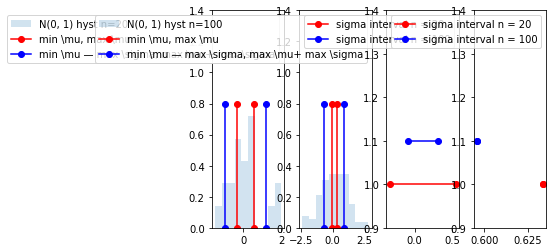

t: 20
m: -0.30687259331790084, 0.5227912689277304
sigma: 0.6740726237327915, 1.2946006448590623
t: 100
m: -0.08886179567029814, 0.3180661935783262
sigma: 0.9003187879104294, 1.1911957899500234


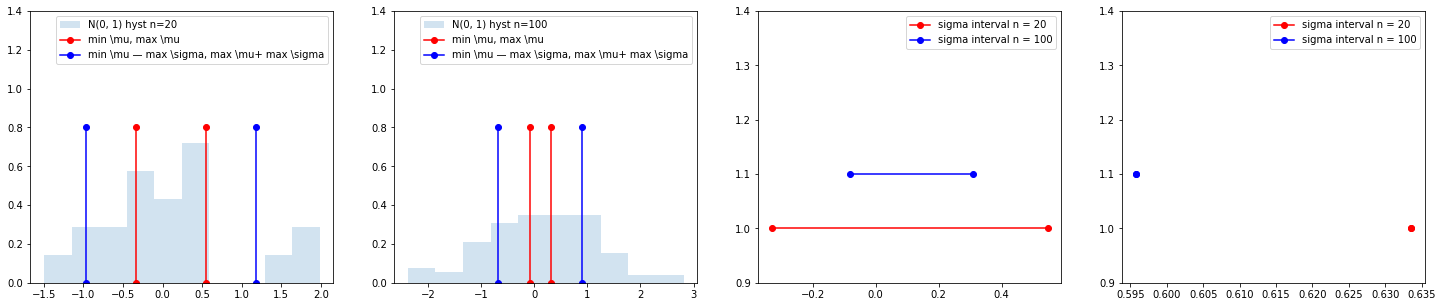

In [7]:
def task4_builder():
    n_set = [20, 100]
    x_20 = normal(20)
    x_100 = normal(100)
    x_set = [x_20, x_100]


    m = AsympMethod(x_set, n_set)
    m.run()
    draw_result(x_set, m.m_all, m.s_all, m.text)

    m = OrdinaryMethod(x_set, n_set)
    m.run()
    draw_result(x_set, m.m_all, m.s_all, m.text)

task4_builder()